# Simple forward simulation in phiflow

how to run
simple model equation $f(x) = ...$ 

In [1]:
from phi.flow import *

# run with phiflow
n = 128
dt = 1./32.
viscosity = 0.01/np.pi
initial = np.asarray( [ [-math.sin(np.pi * x) * 1.] for x in np.linspace(-1,1,n)] )

domain = Domain([n], boundaries=PERIODIC, box=box[-1:1])
state = [BurgersVelocity(domain, velocity=initial, viscosity=viscosity)]

print("Note, the velocity array has a batch dimension, and 1 channel component in this 1D case: "+ format(state[0].velocity.data.shape) ) # -> (1, 128, 1)
print("\nInitial velocity state: " + format(state[0].velocity.data[0][0:5]) +" ..." )

for i in range(32):

    v = state[-1].velocity
    v = diffuse(v, dt * viscosity, substeps=1)
    v = advect.semi_lagrangian(v, v, dt)
    state.append( state[-1].copied_with(velocity=v, age=v.age + dt) )

    # here, we manually execute the different components of the PDE for clarity, 
    # in phiflow we could simply use the step() method of the Burgers() class:
    #state.append( Burgers().step(state[-1], dt=dt) )
    
print("\nLast velocity: " + format(state[-1].velocity.data[0][0:10]) +" ...")

Note, the velocity array has a batch dimension, and 1 channel component in this 1D case: (1, 128, 1)

Initial velocity state: [[1.2246469e-16]
 [4.9453720e-02]
 [9.8786421e-02]
 [1.4787737e-01]
 [1.9660644e-01]] ...

Last velocity: [[0.00552158]
 [0.0165598 ]
 [0.02760994]
 [0.03866227]
 [0.04973169]
 [0.06080895]
 [0.07190682]
 [0.08301631]
 [0.09414805]
 [0.10529345]] ...


So far so good, but not so easy to evaluate. Show in graph: blue is initial state, then times $10/32, 20/32, 1$ in green, cyan and purple:

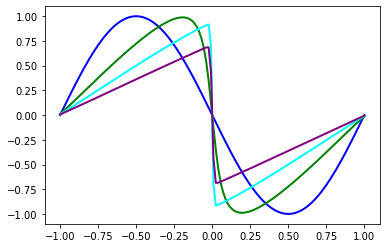

In [2]:
# we only need "velocity.data" from each phiflow state
vels = [x.velocity.data for x in state]
sn = np.concatenate(vels, axis=-1)
sn = np.reshape(sn, list(sn.shape)+[1] ) # print(sn.shape)

# print(vels[0][0,:,0].shape)
# print(vels[0].shape[1])

import matplotlib.pyplot as plt

fig = plt.figure().gca()
fig.plot(np.linspace(-1,1,len(vels[ 0].flatten())), vels[ 0].flatten(), lw=2, color='blue')
fig.plot(np.linspace(-1,1,len(vels[10].flatten())), vels[10].flatten(), lw=2, color='green')
fig.plot(np.linspace(-1,1,len(vels[20].flatten())), vels[20].flatten(), lw=2, color='cyan')
fig.plot(np.linspace(-1,1,len(vels[32].flatten())), vels[32].flatten(), lw=2, color='purple')


And as image...

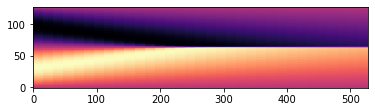

In [3]:
def show_state(a):
    # we only have 33 time steps, blow up by a factor of 2^4 to make it easier to see
    # (could also be done with more evaluations of network)
    for i in range(4):
        a = np.concatenate( [a,a] , axis=3)

    a = np.reshape( a, [a.shape[1],a.shape[2]*a.shape[3]] )
    #print("resulting image size" +format(a.shape))
    plt.imshow(a, origin='lower', cmap='magma')
    
show_state(sn)